In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [73]:
df = sns.load_dataset("titanic")

In [74]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [76]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [77]:
df.drop("deck",inplace=True,axis = 1)

In [78]:
df.dropna(inplace=True)

In [79]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [80]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [81]:
df.duplicated().sum()

np.int64(38)

In [82]:
df.drop_duplicates(inplace=True)

In [83]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns
print("Categorical: ",categorical)
print("Numerical: ",numerical)

Categorical:  Index(['sex', 'embarked', 'class', 'who', 'embark_town', 'alive'], dtype='object')
Numerical:  Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


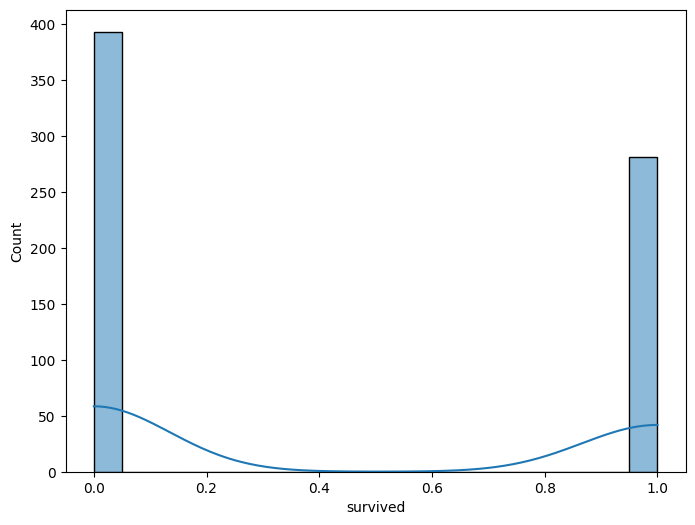

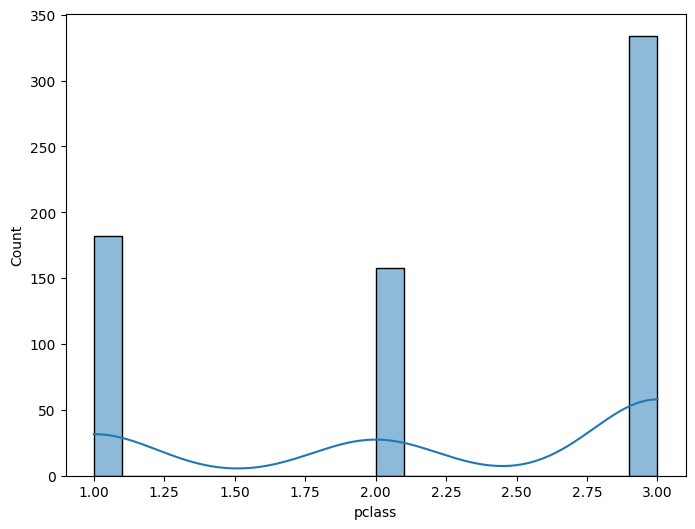

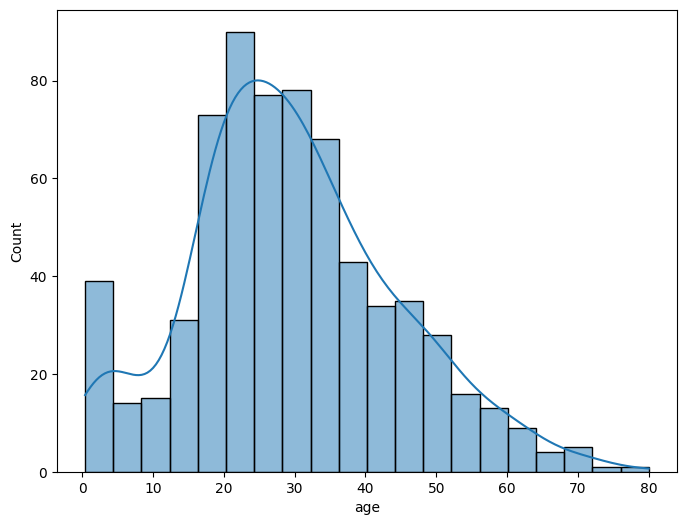

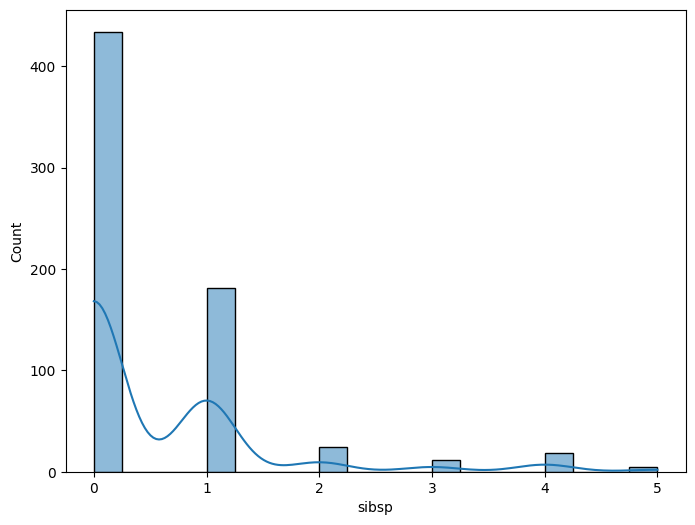

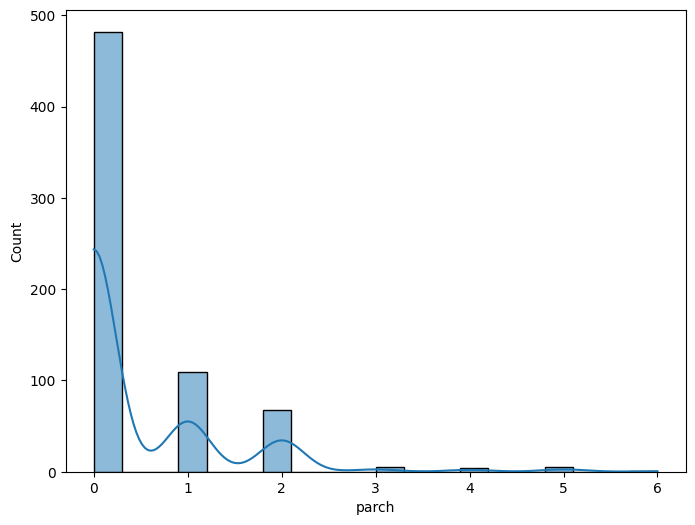

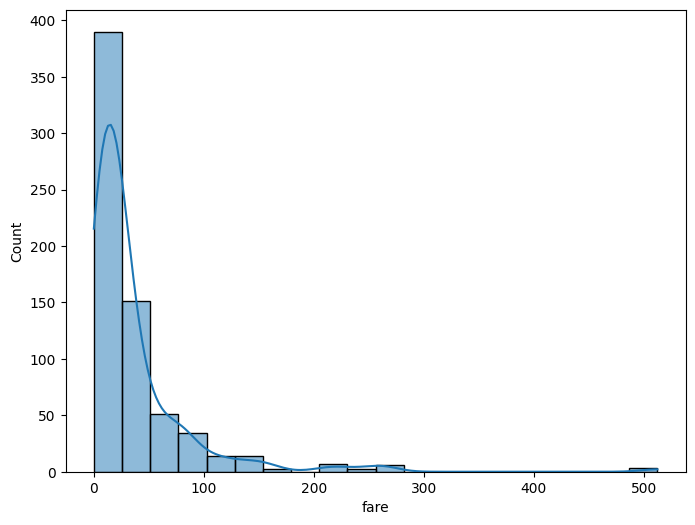

In [84]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],kde=True,bins=20)

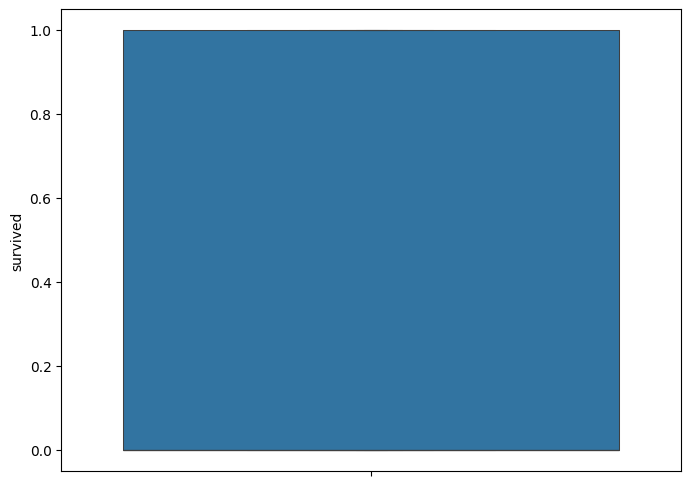

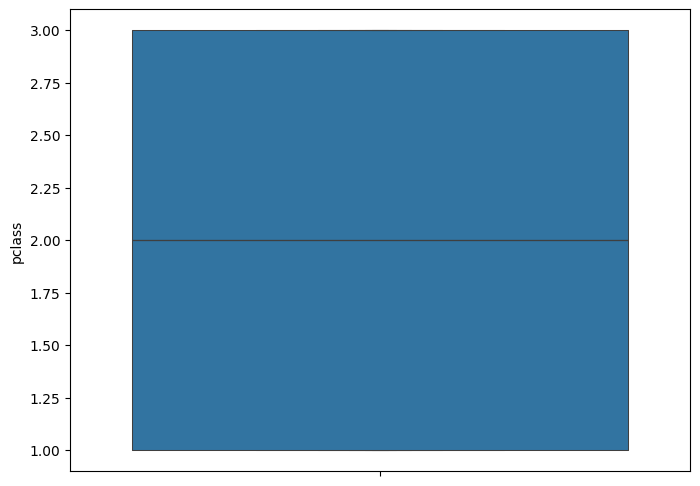

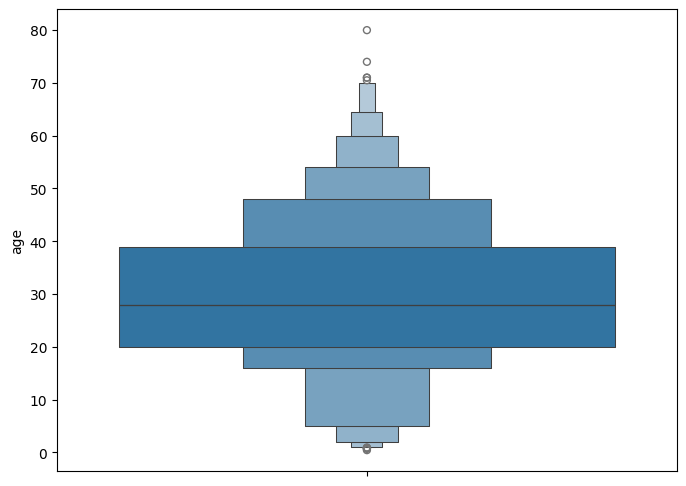

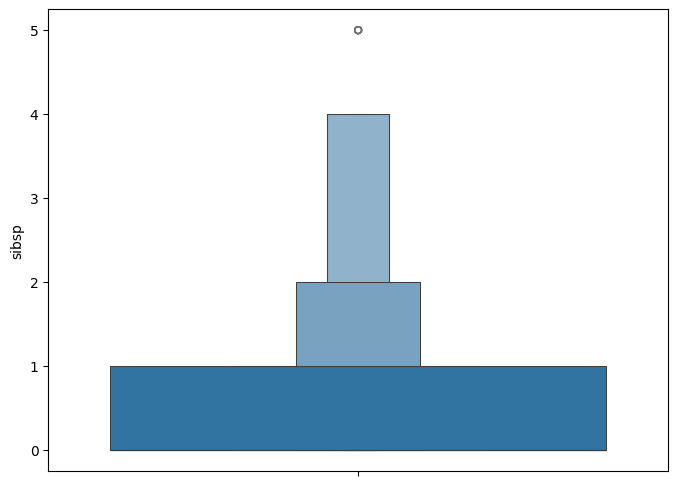

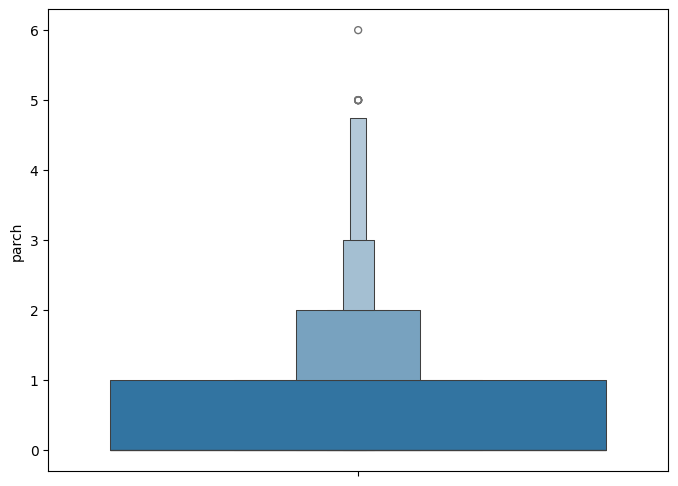

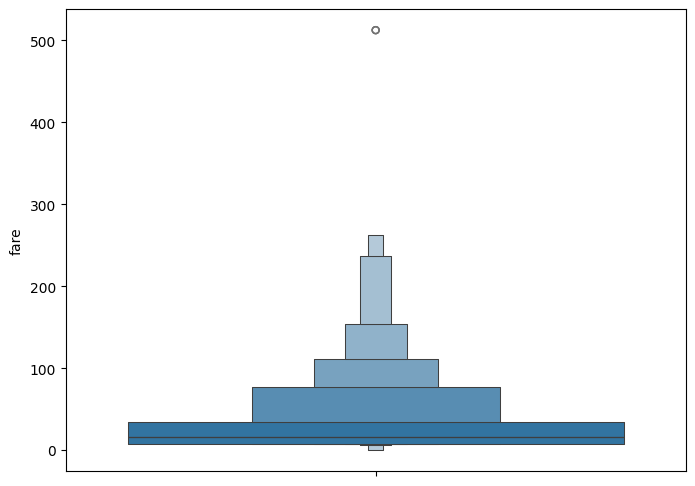

In [85]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxenplot(df[col])

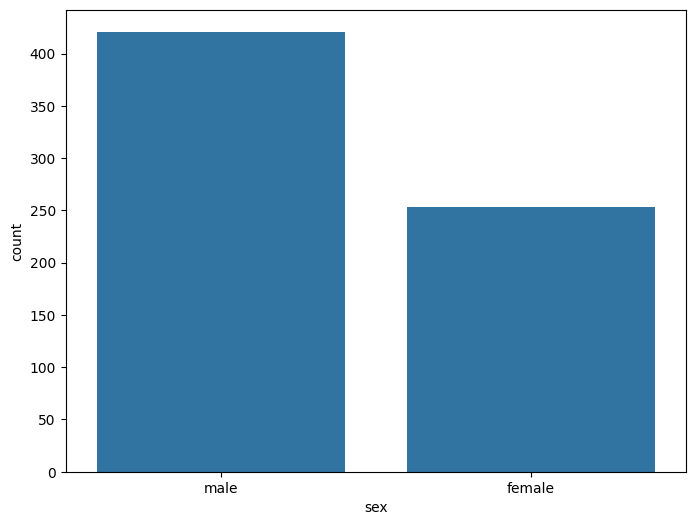

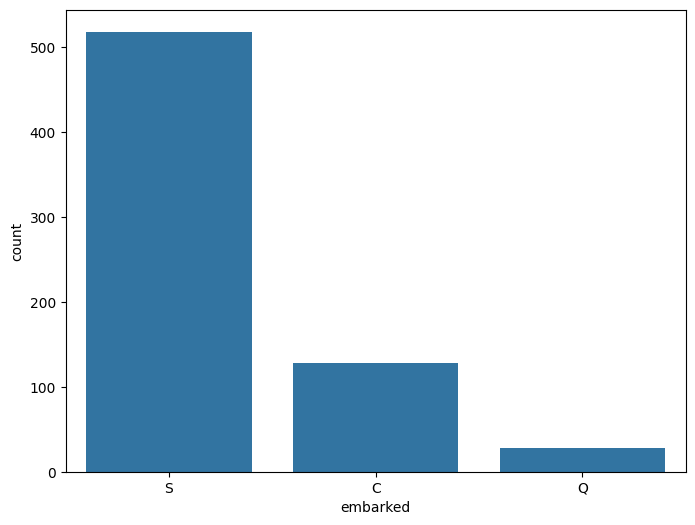

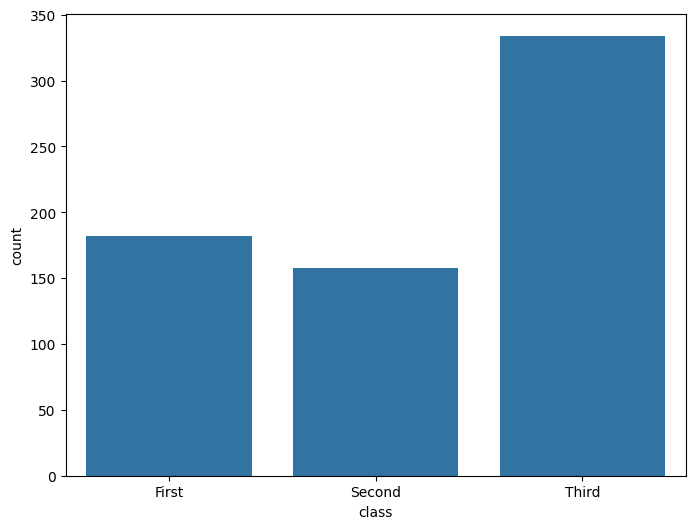

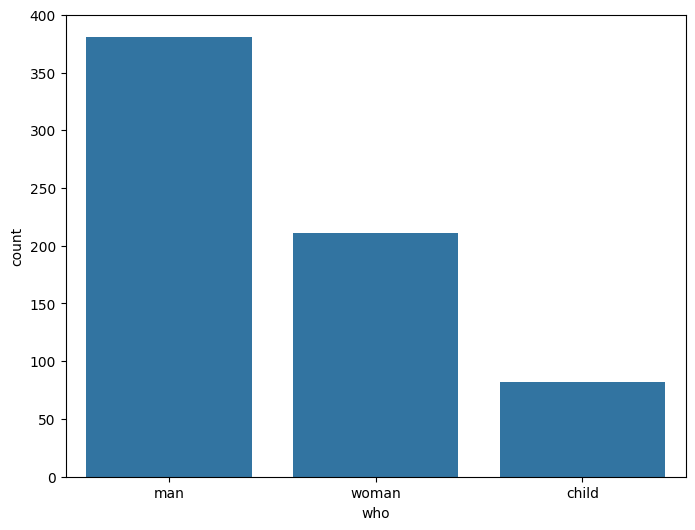

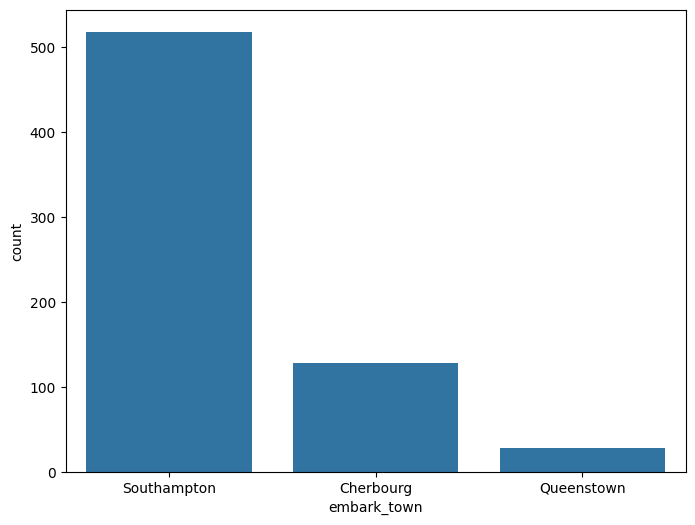

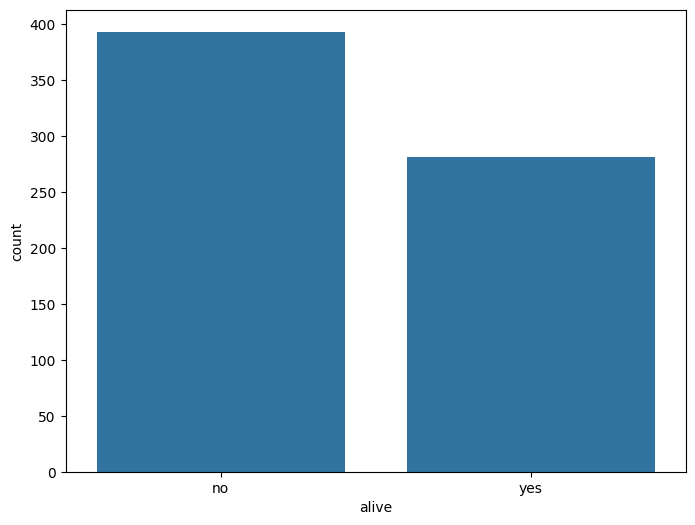

In [86]:
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.countplot(data = df,x = col)

<Axes: >

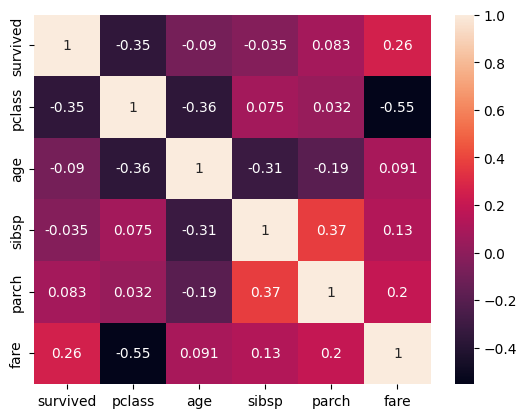

In [87]:
sns.heatmap(df[numerical].corr(),annot=True)

In [88]:
label_en = [col for col in categorical if df[col].nunique() == 2]
hot_en = [col for col in categorical if df[col].nunique() > 2]
print("Label: ",label_en)
print("Hot: ",hot_en)

Label:  ['sex', 'alive']
Hot:  ['embarked', 'class', 'who', 'embark_town']


In [89]:
scaler = StandardScaler()
le = LabelEncoder()

In [90]:
for col in label_en:
  df[col] = le.fit_transform(df[col])

In [91]:
df = pd.get_dummies(df, columns=hot_en)

In [92]:
X = df.drop("survived",axis=1)
y = df["survived"]

In [93]:
X = scaler.fit_transform(X)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,True,0,False,False,False,True,False,False,True,False,True,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,1,False,True,False,False,True,False,False,False,False,True,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,1,True,False,False,True,False,False,True,False,False,True,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,1,False,False,False,True,True,False,False,False,False,True,False,False,True
4,0,3,1,35.0,0,0,8.0500,True,0,True,False,False,True,False,False,True,False,True,False,False,False,True


In [96]:
models = {
    "Logistic Regression":LogisticRegression(),
    "SVM":SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes":GaussianNB(),
    "KNN": KNeighborsClassifier()
}

In [97]:
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5, 7, None],
        "min_samples_split": [2, 5, 10]
    },
    "Naive Bayes": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }
}


In [99]:
best_models = {}

for name, model in models.items():
   print(f"\n🔍 Tuning {name}...")
   grid = GridSearchCV(model,param_grids[name],cv=5,scoring='accuracy',n_jobs=-1)
   grid.fit(X_train,y_train)
   print(f"✅ Best Params for {name}: {grid.best_params_}")
   print(f"⭐ Best Cross-Validation Accuracy: {grid.best_score_:.4f}")
   best_models[name] = grid.best_estimator_
   print(f"\n🚀 Evaluating {name} on Test Set...")
   y_pred = grid.best_estimator_.predict(X_test)
   print("Accuracy:", accuracy_score(y_test, y_pred))
   print(confusion_matrix(y_test, y_pred))
   print(classification_report(y_test, y_pred))


🔍 Tuning Logistic Regression...
✅ Best Params for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
⭐ Best Cross-Validation Accuracy: 1.0000

🚀 Evaluating Logistic Regression on Test Set...
Accuracy: 1.0
[[78  0]
 [ 0 57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        57

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135


🔍 Tuning SVM...
✅ Best Params for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
⭐ Best Cross-Validation Accuracy: 1.0000

🚀 Evaluating SVM on Test Set...
Accuracy: 1.0
[[78  0]
 [ 0 57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        57

    accuracy                           1.00       135
   macro avg       1.00      1

In [100]:
results = []

for name, model in best_models.items():
    acc = accuracy_score(y_test, model.predict(X_test))
    results.append((name, acc))

results = sorted(results, key=lambda x: x[1], reverse=True)

print("\n🏆 Final Model Ranking:")
for name, acc in results:
    print(f"{name}: {acc:.4f}")



🏆 Final Model Ranking:
Logistic Regression: 1.0000
SVM: 1.0000
Decision Tree: 1.0000
Naive Bayes: 1.0000
KNN: 1.0000
